Harikrishnan U S\
R7B - 365

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing import sequence

# Set parameters
max_features = 10000  # Number of words to consider as features
maxlen = 500          # Maximum sequence length
batch_size = 32       # Batch size for training
epochs = 5            # Number of training epochs

# Load and preprocess the IMDB dataset
print("Loading data...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), "train sequences")
print(len(input_test), "test sequences")

print("Pad sequences (samples x time)")
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)

# Build the RNN model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
print("Training model...")
history = model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
print("Evaluating model...")
loss, accuracy = model.evaluate(input_test, y_test, batch_size=batch_size)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Training model...
Epoch 1/5
625/625 [==============================] - 76s 119ms/step - loss: 0.6258 - accuracy: 0.6273 - val_loss: 0.4664 - val_accuracy: 0.7908
Epoch 2/5
625/625 [==============================] - 71s 114ms/step - loss: 0.4996 - accuracy: 0.7574 - val_loss: 0.4921 - val_accuracy: 0.7778
Epoch 3/5
625/625 [==============================] - 73s 117ms/step - loss: 0.3378 - accuracy: 0.8550 - val_loss: 0.5289 - val_accuracy: 0.7584
Epoch 4/5
625/625 [==============================] - 73s 116ms/step - loss: 0.1942 - accuracy: 0.9271 - val_loss: 0.5654 - val_accuracy: 0.7840
Epoch 5/5
625/625 [==============================] - 70s 112ms/step - loss: 0.0874 - accuracy: 0.9724 - val_loss: 0.6969 - val_accuracy: 0.7672
Evaluating model...
782/782 [==============================] - 19s 24ms/step - loss: 0.6827 - accuracy: 0.773

In [11]:
import random

def decode_review(sequence, word_index):
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence])
    decoded_review = decoded_review.replace(' ?', '').replace('br', '')
    return decoded_review

def print_reviews(model, X_test, y_test, num_reviews=5, word_index=None):
    if word_index is None:
        word_index = imdb.get_word_index()
    predictions = model.predict(X_test[:num_reviews])
    for i in range(num_reviews):
        print(f"\nReview #{i + 1}:")
        print("True label:", int(y_test[i]))
        print("Predicted Label:", round(predictions[i][0]))
        decoded_review = decode_review(X_test[i], word_index)
        print("Review Text:")
        print(decoded_review)

print_reviews(model, input_test, y_test, num_reviews=5, word_index=imdb.get_word_index())


1/1 [==============================] - 0s 158ms/step

Review #1:
True label: 0
Predicted Label: 0
Review Text:
? please give this one a miss   and the rest of the cast rendered terrible performances the show is flat flat flat   i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite so all you madison fans give this a miss

Review #2:
True label: 1
Predicted Label: 1
Review Text:
? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances the sandy dennis character apartment but the film builds to a disturbing climax   the characters create an atmosphere with sexual tension and psychological it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i thin

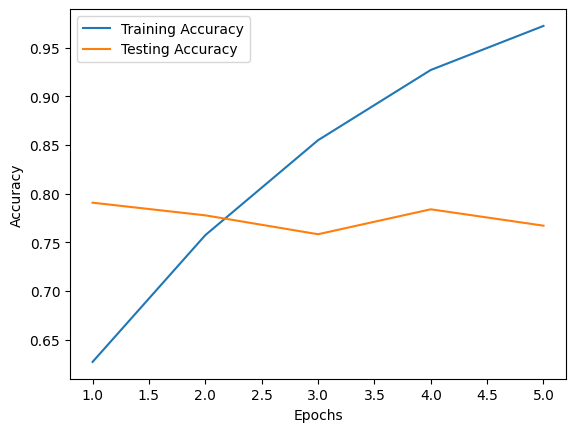

In [14]:
import matplotlib.pyplot as plt
training_accuracy = history.history['accuracy']
testing_accuracy = history.history['val_accuracy']
epochs_range = range(1,6)

plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, testing_accuracy, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()